$$NWRITE = 500$$

$$dt = 0.004$$

Total run time was varied using 

$$\frac{t_{total}}{dt} = NSTEPS$$

In [136]:
import os
import glob

# Get all files in the "data" directory that match the pattern
all_files = sorted(glob.glob("data_500/time*.d")) # x in data_x denotes total run time in picoseconds

# Extract numbers by splitting the filename and converting to integers
all_numbers = [int(f.split("time")[1].split(".d")[0]) for f in all_files] # these will be our times for the MSD plot

# Sort both lists based on the numeric values
all_files.sort(key=lambda x: int(x.split("time")[1].split(".d")[0]))

# print(all_files)
# print(all_numbers) # times in ps (i.e. 0 ps, 2 ps, ..., 100 ps) since I write every 500 and have a dt = 0.004 --> 500 * 0.004 [ps] = write every 2 [ps]

In [137]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 2
y_index = 3
z_index = 4

x_disp_index = 12
y_disp_index = 13
z_disp_index = 14

msd_values = []
run_time = []

for i, file in enumerate(all_files):

    run_time.append(all_numbers[i])
    
    data = np.loadtxt(file)

    x_disp = data[:, x_disp_index]
    y_disp = data[:, y_disp_index]
    z_disp = data[:, z_disp_index]

    squared_disp = x_disp**2 + y_disp**2 + z_disp**2

    msd = np.mean(squared_disp)
    msd_values.append(msd)


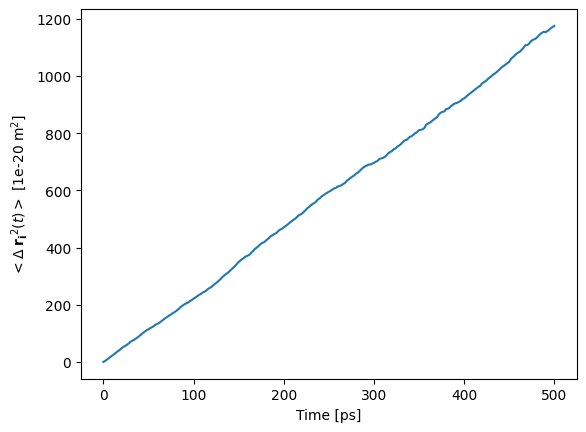

In [138]:
# Convert to numpy arrays
time_steps = np.asarray(run_time)
msd_values = np.asarray(msd_values)

plt.plot(time_steps, msd_values)
plt.xlabel("Time [ps]")
plt.ylabel(r"$<{\Delta \; \mathbf{r_i}^2 (t)}>$ [1e-20 m$^2$]")
plt.show();

$$ MSD = \braket{\Delta \mathbf{r}^2 (t)} = A + 6Dt + \delta $$

where $\delta$ denotes fluctuations

In [139]:
slope, intercept = np.polyfit(time_steps, msd_values, 1)  # Linear fit: polyfit returns degree, degree - 1, degree - 2, ..., 0 

D = slope/6

a2_per_pico_to_cm2_per_second = 10**(-4)

print(f"My diffusion coefficient is {D:.3e} Angstrom^2 per picosecond")
print(f"or {D*a2_per_pico_to_cm2_per_second:.3e} cm^2 per second")

My diffusion coefficient is 3.912e-01 Angstrom^2 per picosecond
or 3.912e-05 cm^2 per second


# Question 3

In [143]:
pcle_of_interest = 11 # arbitrarily choose 12th particle

x_index = 2
y_index = 3
z_index = 4

# intialize arrays for x, y, z positions with same dimensions as time array
x_positions = np.empty_like(np.asarray(run_time), dtype=np.float32)
y_positions = np.empty_like(np.asarray(run_time), dtype=np.float32)
z_positions = np.empty_like(np.asarray(run_time), dtype=np.float32)

for i, file in enumerate(all_files):
    
    data = np.loadtxt(file)

    x = data[pcle_of_interest, x_index]
    y = data[pcle_of_interest, y_index]
    z = data[pcle_of_interest, z_index]

    x_positions[i] = x
    y_positions[i] = y
    z_positions[i] = z

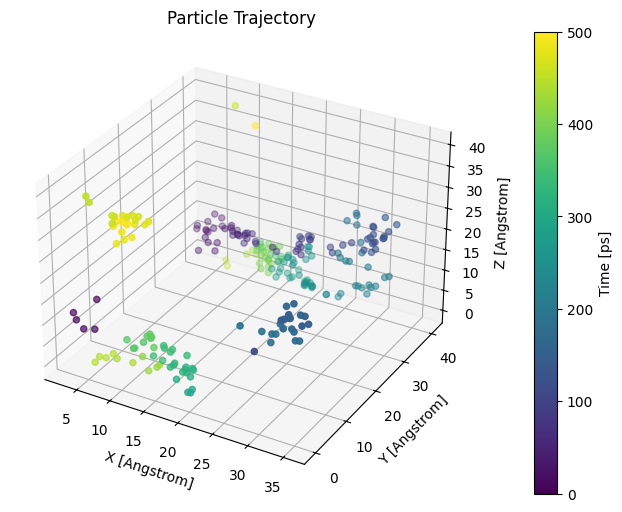

In [145]:
# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with time as color
sc = ax.scatter(x_positions, y_positions, z_positions, c=run_time, cmap='viridis', marker='o')

# Colorbar to indicate time progression
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Time [ps]")

# Labels
ax.set_xlabel("X [Angstrom]")
ax.set_ylabel("Y [Angstrom]")
ax.set_zlabel("Z [Angstrom]")
ax.set_title("Particle Trajectory")

plt.show()


Not gonna lie, I asked an LLM to help me add lines

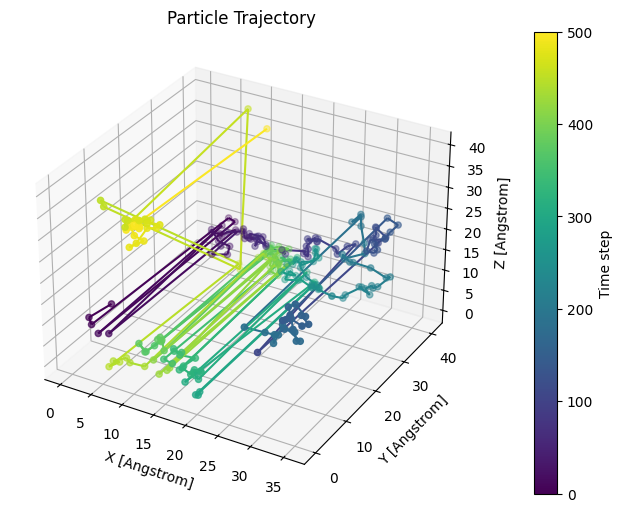

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib.colors as mcolors

x, y, z = x_positions, y_positions, z_positions

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create line segments
points = np.array([x, y, z]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)  # Pairs of points

# Create line collection with colors
norm = plt.Normalize(np.asarray(run_time).min(), np.asarray(run_time).max())
colors = plt.cm.viridis(norm(run_time[:-1]))  # Map time to colors
lc = Line3DCollection(segments, cmap='viridis', norm=norm)
lc.set_array(run_time[:-1])  # Set color values

# Add line collection to plot
ax.add_collection(lc)

# Scatter plot for individual points
sc = ax.scatter(x, y, z, c=run_time, cmap='viridis', marker='o')

# Colorbar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Time step")

# Labels
ax.set_xlabel("X [Angstrom]")
ax.set_ylabel("Y [Angstrom]")
ax.set_zlabel("Z [Angstrom]")
ax.set_title("Particle Trajectory")

plt.show()


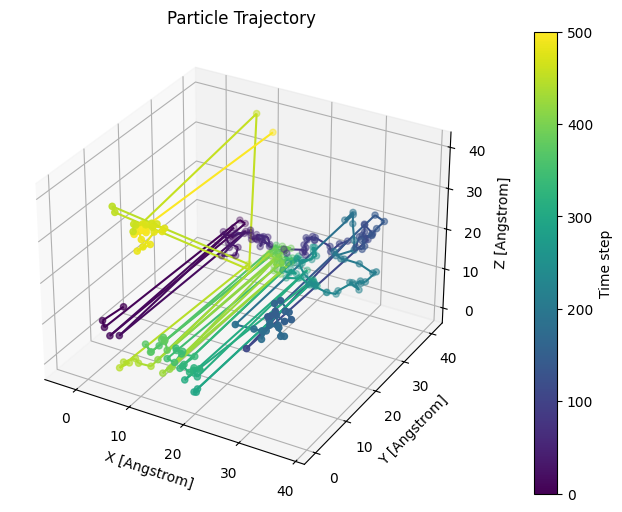

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib.colors as mcolors

x, y, z = x_positions, y_positions, z_positions

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create line segments
points = np.array([x, y, z]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)  # Pairs of points

# Create line collection with colors
norm = plt.Normalize(np.asarray(run_time).min(), np.asarray(run_time).max())
colors = plt.cm.viridis(norm(run_time[:-1]))  # Map time to colors
lc = Line3DCollection(segments, cmap='viridis', norm=norm)
lc.set_array(run_time[:-1])  # Set color values

# Add line collection to plot
ax.add_collection(lc)

# Scatter plot for individual points
sc = ax.scatter(x, y, z, c=run_time, cmap='viridis', marker='o')

# Colorbar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Time step")

# Labels
ax.set_xlabel("X [Angstrom]")
ax.set_ylabel("Y [Angstrom]")
ax.set_zlabel("Z [Angstrom]")
ax.set_title("Particle Trajectory")

# Function to set equal aspect ratio
def set_axes_equal(ax):
    """Sets equal aspect ratio for a 3D plot."""
    x_limits = ax.get_xlim()
    y_limits = ax.get_ylim()
    z_limits = ax.get_zlim()

    x_range = x_limits[1] - x_limits[0]
    y_range = y_limits[1] - y_limits[0]
    z_range = z_limits[1] - z_limits[0]

    max_range = max(x_range, y_range, z_range) / 2.0

    x_middle = np.mean(x_limits)
    y_middle = np.mean(y_limits)
    z_middle = np.mean(z_limits)

    ax.set_xlim(x_middle - max_range, x_middle + max_range)
    ax.set_ylim(y_middle - max_range, y_middle + max_range)
    ax.set_zlim(z_middle - max_range, z_middle + max_range)

# Apply equal aspect ratio
set_axes_equal(ax)

plt.show()